#1 张量创建：从无到有构建基础单元

tesor是PyTorch的核心数据结构，类似NumPy数组，但支持GPU加速和自动微分。以下是最常用的创建方式：

| op  | 功能描述| 关键参数 |
|----------|----------|----------|
|torch.tensor|	从列表/元组/NumPy数组转换为张量|	data(输入数据)、requires_grad(是否追梯度)|
|torch.zeros|	生成全0张量	|size(张量形状，如(2,3))|
|torch.ones|	生成全1张量	|size(张量形状)|
|torch.rand|	生成[0,1)均匀分布的随机张量	|size(张量形状)|
|torch.randn|	生成均值0、标准差1的正态分布随机张量	|size(张量形状)|
|torch.arange|	生成等差数列张量（类似Python的range）|	start(起始值)、end(终止值)、step(步长)|
|torch.linspace|	生成固定数量的均匀间隔张量（包含终点）	|start、end、steps(间隔数)|
|torch.logspace|	生成对数尺度的均匀间隔张量	|start、end、steps、base(对数基，默认10)|
|torch.eye|	生成单位矩阵（对角线1，其余0）	|n(行数)、m(列数，默认等于n)|
|torch.empty|	生成未初始化张量（内存残留值，速度快）| size(张量形状)|
|torch.full|	生成全为指定值的张量	|size(形状)、fill_value(填充值）|



In [ ]:
import torch

# 1. 从列表创建张量，指定追梯度
# 只有浮点数才可以设置梯度
a = torch.tensor([1.0, 2, 3], requires_grad=True)
print("torch.tensor创建：", a)  # 输出：tensor([1, 2, 3], requires_grad=True)

# 2. 生成2行3列的全0张量
b = torch.zeros(2, 3)
print("torch.zeros创建：\n", b)  # 输出2x3的0矩阵

# 3. 生成0到10、步长2的等差数列
c = torch.arange(0, 10, 2)
print("torch.arange创建：", c)  # 输出：tensor([0, 2, 4, 6, 8])

torch.tensor创建： tensor([1., 2., 3.], requires_grad=True)
torch.zeros创建：
 tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.arange创建： tensor([0, 2, 4, 6, 8])


#2 元素级运算：逐元素的加减乘除与函数
对张量中每个元素单独操作，要求输入张量形状相同（或满足广播条件）。
##2.1 基础算术运算
# PyTorch 逐元素数学运算速查表

## 📌 基础操作对照表

| 操作        | 功能描述                     | 语法示例                                 | 补充说明 |
|-------------|------------------------------|------------------------------------------|--------|
| `torch.add` | 逐元素加法                   | `torch.add(a, b, alpha=2)`               | 等价于 `a + alpha * b`；`alpha` 可选，默认为1 |
| `torch.sub` | 逐元素减法                   | `torch.sub(a, b)`                        | 等价于 `a - b` |
| `torch.mul` | 逐元素乘法（非矩阵乘）       | `torch.mul(a, b)`                        | 等价于 `a * b`；注意不是 `torch.mm` 或 `@` |
| `torch.div` | 逐元素除法                   | `torch.div(a, b)`                        | 默认为浮点除法；可指定 `rounding_mode='floor'` 或 `'trunc'` |
| `torch.pow` | 逐元素幂运算                 | `torch.pow(a, 2)`                        | 支持标量或张量作为指数，如 `torch.pow(a, b)` |
| `torch.sqrt`| 逐元素平方根                 | `torch.sqrt(a)`                          | 输入必须 ≥ 0，否则返回 `nan` |
| `torch.exp` | 逐元素自然指数（$e^x$）     | `torch.exp(a)`                           | 常用于激活函数（如 Softmax）前处理 |
| `torch.log` | 逐元素自然对数（$\ln x$）   | `torch.log(a)`                           | 要求 `a > 0`，否则返回 `nan` 或 `-inf` |

---

## 💡 使用小贴士

- **广播支持**：所有上述操作都支持广播（broadcasting），即不同形状的张量在满足广播规则时可自动对齐。
- **In-place 操作**：大多数函数有 in-place 版本（以 `_` 结尾），例如 `a.add_(b)` 会直接修改 `a`，节省内存但需谨慎使用。
- **数值稳定性**：使用 `torch.log` 或 `torch.sqrt` 时，确保输入满足定义域要求，避免出现 `nan` 或 `inf`。

In [ ]:
import torch

a = torch.tensor([1.0, 4.0, 9.0])
b = torch.tensor([2.0, 2.0, 2.0])

print(torch.add(a, b, alpha=0.5))   # 输出: tensor([ 2.,  5., 10.])
print(torch.mul(a, b))              # 输出: tensor([ 2.,  8., 18.])
print(torch.sqrt(a))                # 输出: tensor([1., 2., 3.])
print(torch.log(a))                 # 输出: tensor([0.0000, 1.3863, 2.1972])
a.add_(b)
print(a)                            # 输出: tensor([ 3.,  6., 11.])

tensor([ 2.,  5., 10.])
tensor([ 2.,  8., 18.])
tensor([1., 2., 3.])
tensor([0.0000, 1.3863, 2.1972])
tensor([ 3.,  6., 11.])


##2.2 统计类运算
### 📊 基础统计运算

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `torch.sum` | 计算张量元素总和 | `torch.sum(a)` / `torch.sum(a, dim=0)` | 支持沿特定维度求和，`keepdim=True`保留维度 |
| `torch.mean` | 计算张量元素均值 | `torch.mean(a)` / `torch.mean(a, dim=1)` | 数据类型必须为浮点型，否则报错 |
| `torch.std` | 计算标准差 | `torch.std(a, unbiased=True)` | `unbiased=False`使用总体标准差 |
| `torch.var` | 计算方差 | `torch.var(a, unbiased=True)` | 与 `std` 类似，可选无偏估计 |
| `torch.min` | 最小值及索引 | `torch.min(a)` / `torch.min(a, dim=1)` | 返回 `(values, indices)` 元组 |
| `torch.max` | 最大值及索引 | `torch.max(a)` / `torch.max(a, dim=0)` | 返回 `(values, indices)` 元组 |
| `torch.argmin` | 最小值索引 | `torch.argmin(a, dim=0)` | 返回索引位置，不返回值本身 |
| `torch.argmax` | 最大值索引 | `torch.argmax(a, dim=1)` | 返回索引位置，不返回值本身 |

---

### 🧮 高级统计运算

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `torch.median` | 中位数 | `torch.median(a)` / `torch.median(a, dim=1)` | 返回 `(values, indices)` 元组 |
| `torch.mode` | 众数 | `torch.mode(a, dim=0)` | 返回 `(values, indices)` 元组 |
| `torch.quantile` | 分位数 | `torch.quantile(a, q=0.5)` | `q` 为分位点 (0~1)，仅支持一维张量或指定维度 |
| `torch.topk` | 最大的 k 个值 | `torch.topk(a, k=3, dim=1)` | 返回 `(values, indices)` 元组，按降序排列 |
| `torch.sort` | 排序 | `torch.sort(a, dim=0, descending=False)` | 返回 `(values, indices)` 元组 |
| `torch.unique` | 去重并排序 | `torch.unique(a, return_counts=True)` | 可选择返回计数 (`return_counts=True`) |

---

### 💡 使用小贴士

- **维度参数**：大部分统计函数支持 `dim` 参数，用于沿特定轴计算。不指定时默认对全部元素操作。
- **保持维度**：使用 `keepdim=True` 可保留输出张量的维度信息，便于后续计算。
- **数据类型**：`mean`、`std`、`var` 等函数要求输入为浮点类型，整数张量需先转换（如 `.float()`）。
- **NaN 处理**：统计函数通常会传播 NaN 值（如含 NaN 的区域结果为 NaN），可用 `torch.nanmean` 等函数忽略 NaN。

---
> ⚠️ 注意：某些函数（如 `quantile`）在旧版 PyTorch 中可能不可用，建议检查版本兼容性。

In [ ]:
import torch

a = torch.tensor([[1.0, 4.0, 3.0],
                  [2.0, 1.0, 6.0]])

print(torch.sum(a))                 # 输出: tensor(17.)
print(torch.mean(a, dim=1))         # 输出: tensor([2.6667, 3.0000])
print(torch.std(a, unbiased=False)) # 输出: tensor(1.7512)
print(torch.min(a, dim=0))          # 输出: values=tensor([1., 1., 3.]), indices=tensor([0, 1, 0])
print(torch.argmax(a, dim=1))       # 输出: tensor([1, 2])

tensor(17.)
tensor([2.6667, 3.0000])
tensor(1.7717)
torch.return_types.min(
values=tensor([1., 1., 3.]),
indices=tensor([0, 1, 0]))
tensor([1, 2])


#3 矩阵运算：线性代数核心操作


### 🔢 基础矩阵运算

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `torch.mm` | 矩阵乘法（2D × 2D） | `torch.mm(A, B)` | A.shape[-1] == B.shape[-2] |
| `torch.matmul` | 通用矩阵乘法 | `torch.matmul(A, B)` | 支持批量操作和广播<br/>对于更高维度张量，建议使用 torch.matmul 或 @ 运算符 |
| `torch.bmm` | 批量矩阵乘法 | `torch.bmm(batch_A, batch_B)` | 输入为 3D 张量 (batch, n, m)<br/>第一维度必须相同（批次大小）<br/>专为批量操作优化，比循环调用 torch.mm 更快
 |
| `@` 运算符 | 矩阵乘法（Python 3.5+） | `A @ B` | 等价于 `torch.matmul(A, B)` |
| `torch.dot` | 向量点积 | `torch.dot(a, b)` | 仅适用于 1D 向量 |
| `torch.cross` | 向量叉积 | `torch.cross(a, b, dim=0)` | 3D 向量叉积 |
| `torch.outer` | 向量外积 | `torch.outer(a, b)` | 返回矩阵 (len(a), len(b)) |

---

### 🧮 矩阵分解与变换

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `torch.inverse` | 矩阵求逆 | `torch.inverse(A)` | A 必须为方阵且可逆 |
| `torch.det` | 行列式 | `torch.det(A)` | 仅对方阵有效 |
| `torch.svd` | 奇异值分解 | `U, S, V = torch.svd(A)` | A = U diag(S) V^T |
| `torch.qr` | QR 分解 | `Q, R = torch.qr(A)` | A = Q R |
| `torch.eig` | 特征值与特征向量 | `e, v = torch.eig(A, eigenvectors=True)` | 仅支持实矩阵 |
| `torch.cholesky` | Cholesky 分解 | `L = torch.cholesky(A)` | A 必须为正定矩阵 |

---

### 🧮 矩阵属性与变换

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `torch.transpose` | 矩阵转置 | `torch.transpose(A, 0, 1)` | 交换两个维度 |
| `torch.t` | 2D 张量转置 | `torch.t(A)` | 等价于 `A.T` |
| `torch.trace` | 矩阵迹（对角线和） | `torch.trace(A)` | 仅对方阵有效 |
| `torch.norm` | 范数计算 | `torch.norm(A, p=2, dim=0)` | 支持多种范数（p=1,2,'fro','nuc'等） |
| `torch.diag` | 对角线提取/构造 | `torch.diag(A)` / `torch.diag(v)` | 可提取对角线或构造对角矩阵 |

---


## 💡 使用小贴士

- **矩阵乘法选择**：
  - `torch.mm`: 仅限 2D 矩阵乘法
  - `torch.matmul`: 通用矩阵乘法，支持更高维张量和广播
  - `@`: Python 内置矩阵乘法运算符，推荐使用
- **数值稳定性**：矩阵求逆和分解操作对数值精度敏感，考虑使用 `double` 类型提高精度
- **GPU 加速**：所有线性代数操作都支持 GPU 计算，只需将张量移到 CUDA 设备上
- **梯度追踪**：大多数线性代数操作支持自动微分，可用于深度学习模型

> ⚠️ 注意：某些分解函数（如 `eig`）在复数域上的行为可能与 NumPy 不同，建议查阅官方文档确认细节。

In [ ]:
###bmm
import torch

# 示例：计算多个查询-键-值的注意力权重
batch_size, seq_len, d_k = 2, 4, 3
queries = torch.randn(batch_size, seq_len, d_k)  # 查询矩阵
keys = torch.randn(batch_size, seq_len, d_k)     # 键矩阵

# 计算注意力分数 (queries @ keys^T)
attn_scores = torch.bmm(queries, keys.transpose(1, 2))
# 结果形状: (2, 4, 4) - 每个样本的注意力矩阵

print(f"Attention scores shape: {attn_scores.shape}")


Attention scores shape: torch.Size([2, 4, 4])


#4 张量变形：调整形状与维度速查表

---

### 📐 基础形状操作

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `tensor.shape` / `tensor.size()` | 查看张量形状 | `x.shape` | 返回 `torch.Size` 对象 |
| `tensor.numel()` | 元素总数 | `x.numel()` | 等价于 `prod(x.shape)` |
| `tensor.reshape(*shape)` | 改变形状（返回新视图或拷贝） | `x.reshape(2, -1)` | `-1` 自动推断该维度大小 |
| `tensor.view(*shape)` | 改变形状（仅返回视图） | `x.view(4, 3)` | 要求内存连续，否则报错 |
| `tensor.resize_(*shape)` | **就地**改变形状（可能丢失数据） | `x.resize_(2, 6)` | ⚠️ 危险操作，慎用 |

---

### 🔁 维度变换

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `tensor.unsqueeze(dim)` | 增加一个维度（大小为1） | `x.unsqueeze(0)` | 相当于 `x[None, :]` |
| `tensor.squeeze(dim=None)` | 移除大小为1的维度 | `x.squeeze()` | 若指定 `dim`，仅移除该维（若为1） |
| `tensor.transpose(dim0, dim1)` | 交换两个维度 | `x.transpose(0, 1)` | 适用于任意维度张量 |
| `tensor.t()` | 2D 张量转置 | `x.t()` | 仅限 2D，等价于 `x.T` |
| `tensor.permute(*dims)` | 重排所有维度顺序 | `x.permute(2, 0, 1)` | 类似 NumPy 的 `transpose` |

---

### 🧩 高级重组操作

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `torch.cat(tensors, dim=0)` | 沿现有维度拼接 | `torch.cat([a, b], dim=1)` | 张量在其他维度上必须一致 |
| `torch.stack(tensors, dim=0)` | 沿新维度堆叠 | `torch.stack([a, b], dim=0)` | 所有张量形状必须完全相同 |
| `torch.chunk(tensor, chunks, dim=0)` | 分割为若干块 | `torch.chunk(x, 3, dim=1)` | 尽可能均分，最后一块可能较小 |
| `torch.split(tensor, split_size_or_sections, dim=0)` | 按指定大小分割 | `torch.split(x, [2, 3], dim=1)` | 可指定每块大小 |
| `torch.flatten(input, start_dim=0, end_dim=-1)` | 展平指定维度范围 | `torch.flatten(x, 1)` | 常用于 CNN 到全连接层过渡 |

---

### 🔄 特殊变形操作

| 操作 | 功能描述 | 语法示例 | 补充说明 |
|------|----------|----------|----------|
| `torch.repeat_interleave(input, repeats, dim=None)` | 重复元素 | `x.repeat_interleave(2, dim=0)` | 每个元素重复多次 |
| `tensor.repeat(*sizes)` | 沿各维度重复整个张量 | `x.repeat(2, 3)` | 不同于 `expand`，会复制数据 |
| `tensor.expand(*sizes)` | 广播到更大形状（不复制数据） | `x.expand(3, -1)` | `-1` 表示保持原尺寸 |
| `torch.tile(input, dims)` | 重复张量（类似 NumPy tile） | `torch.tile(x, (2, 1))` | PyTorch 1.8+ 支持 |

---

## 💡 使用小贴士

### ✅ `view` vs `reshape`
- **`view`**: 仅当张量内存连续时可用，返回视图（不拷贝数据）
- **`reshape`**: 总是安全，必要时自动拷贝数据
```python
x = torch.tensor([[1, 2, 3], [4, 5, 6]])
y = x.t()  # 转置后内存不连续
# y.view(-1)  # ❌ 报错！
z = y.reshape(-1)  # ✅ 安全
```

### ✅ 常见模式
```python
# 添加 batch 维度
x = torch.randn(3, 224, 224)
x_batch = x.unsqueeze(0)  # (1, 3, 224, 224)

# 移除单例维度
x = torch.randn(1, 3, 1, 224, 224)
x_clean = x.squeeze()     # (3, 224, 224)

# NHWC → NCHW（图像格式转换）
images_nhwc = torch.randn(32, 224, 224, 3)
images_nchw = images_nhwc.permute(0, 3, 1, 2)  # (32, 3, 224, 224)
```

---

## 🧪 实战示例

```python
import torch

# 原始张量
x = torch.arange(12).reshape(3, 4)
print("原始:", x.shape)  # torch.Size([3, 4])

# reshape/view
y = x.reshape(2, 6)
print("reshape:", y.shape)  # torch.Size([2, 6])

# unsqueeze/squeeze
z = x.unsqueeze(1)  # (3, 1, 4)
z_squeezed = z.squeeze(1)  # (3, 4)

# permute
img = torch.randn(2, 3, 32, 32)  # (N, C, H, W)
img_hwc = img.permute(0, 2, 3, 1)  # (N, H, W, C)

# flatten for MLP
features = torch.flatten(img, 1)  # (2, 3072)

# repeat vs expand
a = torch.tensor([1, 2, 3])
b = a.repeat(2)      # tensor([1, 2, 3, 1, 2, 3]) - 复制数据
c = a.expand(2, -1)  # shape (2, 3) - 共享内存
```

> ⚠️ 注意：
> - `view`/`reshape` 要求元素总数不变
> - `squeeze` 默认移除所有大小为1的维度，指定 `dim` 可精确控制
> - `expand` 不分配新内存，适合临时广播；`repeat` 会复制数据，适合需要独立副本的场景

#5 梯度与计算图：PyTorch自动微分核心

## 🧠 核心概念

### 1. **计算图（Computational Graph）**
- PyTorch 动态构建**反向计算图**（Reverse-mode AD）
- 每次前向传播时记录操作，用于反向传播
- 图结构在 `backward()` 后自动释放（除非设置 `retain_graph=True`）

### 2. **梯度追踪（Gradient Tracking）**
- 只有 `requires_grad=True` 的张量才会参与梯度计算
- 操作结果的 `requires_grad` 继承自输入张量（任一为 True 则结果为 True）

---

## 🔑 核心属性与方法

| 属性/方法 | 功能描述 | 示例 |
|-----------|----------|--------------------------------------------|
| `tensor.requires_grad` | 是否需要计算梯度 | `x = torch.tensor(1.0, requires_grad=True)` |
| `tensor.grad` | 存储梯度值（反向传播后） | `print(x.grad)` |
| `tensor.grad_fn` | 指向创建该张量的函数 | `y.grad_fn` 返回 `<AddBackward0>` |
| `tensor.backward()` | 执行反向传播 | `loss.backward()` |
| `torch.no_grad()` | 临时禁用梯度计算 | `with torch.no_grad(): ...` |

---

## 📈 基本工作流程

```python
import torch

# 1. 创建需要梯度的张量
x = torch.tensor(2.0, requires_grad=True)
w = torch.tensor(3.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)

# 2. 前向传播（构建计算图）
y = w * x + b  # y = 3*2 + 1 = 7
loss = y ** 2  # loss = 49

# 3. 反向传播
loss.backward()

# 4. 查看梯度
print(f"x.grad: {x.grad}")    # 84.0 (d(loss)/dx = 2*y*w = 2*7*3)
print(f"w.grad: {w.grad}")    # 56.0 (d(loss)/dw = 2*y*x = 2*7*2)
print(f"b.grad: {b.grad}")    # 14.0 (d(loss)/db = 2*y = 2*7)
```

---

## ⚙️ 高级控制选项

### 1. **梯度清零**
```python
# 方法1：直接置零
optimizer.zero_grad()  # 推荐（优化器方式）

# 方法2：手动清零
x.grad.zero_()  # 注意：必须是就地操作

# 方法3：重新创建（不推荐）
x.grad = None  # PyTorch 1.7+ 支持，会自动重新分配
```

### 2. **停止梯度传播**
```python
# 方式1：detach() - 返回新张量，无梯度
z = y.detach()

# 方式2：torch.no_grad() - 上下文管理器
with torch.no_grad():
    prediction = model(x)

# 方式3：requires_grad_(False) - 就地修改
x.requires_grad_(False)
```

### 3. **保留计算图**
```python
# 默认情况下，backward() 后计算图被释放
loss.backward(retain_graph=True)  # 保留图，可多次调用 backward()
```

---

## 🧩 复杂场景处理

### 1. **标量 vs 非标量输出**
```python
# 标量输出（最常见）
loss = torch.sum(y)  # 或 y.mean(), y.sum()
loss.backward()      # 直接调用

# 非标量输出（需要提供 grad_tensors）
y = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y.backward(torch.tensor([1.0, 1.0, 1.0]))  # 指定每个输出的梯度权重
```

### 2. **梯度累加**
```python
# 梯度不会自动清零，而是累加
for i in range(2):
    loss = (x ** 2).sum()
    loss.backward()
    
print(x.grad)  # 是单次梯度的2倍
```

### 3. **自定义梯度函数**
```python
class CustomFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input.clamp(min=0)
    
    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        grad_input = grad_output.clone()
        grad_input[input < 0] = 0
        return grad_input

# 使用自定义函数
custom_relu = CustomFunction.apply
output = custom_relu(x)
```

---

## 🛡️ 最佳实践与注意事项

### ✅ 推荐做法
- **使用优化器管理梯度清零**：`optimizer.zero_grad()`
- **推理时禁用梯度**：`with torch.no_grad():`
- **检查梯度是否存在**：`if tensor.grad is not None:`
- **避免就地操作**：如 `x += 1` 可能破坏计算图

### ⚠️ 常见陷阱
| 问题 | 解决方案 |
|------|----------|
| **梯度爆炸/消失** | 梯度裁剪、权重初始化、归一化 |
| **内存泄漏** | 避免在训练循环中保存 `.grad` 引用 |
| **就地操作错误** | 使用 `x = x + 1` 而非 `x += 1` |
| **梯度未清零** | 每个 batch 开始前调用 `zero_grad()` |

### 🔍 调试技巧
```python
# 检查张量是否参与梯度计算
print(x.requires_grad)

# 检查计算图连接
print(y.grad_fn)

# 检查梯度值
print(x.grad)

# 检查是否有 NaN 梯度
if torch.isnan(x.grad).any():
    print("Gradient contains NaN!")
```

---

## 🧪 完整训练循环示例

```python
import torch
import torch.nn as nn

# 模型和数据
model = nn.Linear(10, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# 训练循环
for epoch in range(100):
    # 前向传播
    inputs = torch.randn(32, 10)
    targets = torch.randn(32, 1)
    
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # 反向传播
    optimizer.zero_grad()  # 清零梯度
    loss.backward()        # 计算梯度
    optimizer.step()       # 更新参数
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')
```

> 💡 **关键要点**：PyTorch 的自动微分是**动态的**（define-by-run），每次前向传播都会重新构建计算图，这使得调试和控制更加灵活。

/tmp/ipython-input-2313355390.py:70: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2313355390.py:70: UserWarning: Glyph 19994 (\N{CJK UNIFIED IDEOGRAPH-4E1A}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2313355390.py:70: UserWarning: Glyph 21153 (\N{CJK UNIFIED IDEOGRAPH-52A1}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2313355390.py:70: UserWarning: Glyph 21344 (\N{CJK UNIFIED IDEOGRAPH-5360}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2313355390.py:70: UserWarning: Glyph 27604 (\N{CJK UNIFIED IDEOGRAPH-6BD4}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2313355390.py:70: UserWarning: Glyph 24180 (\N{CJK UNIFIED IDEOGRAPH-5E74}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2313355390.py:70: UserWarning: Glyph 21508 (\N{CJK UNIFIED IDEOGRAPH-5404}) missi

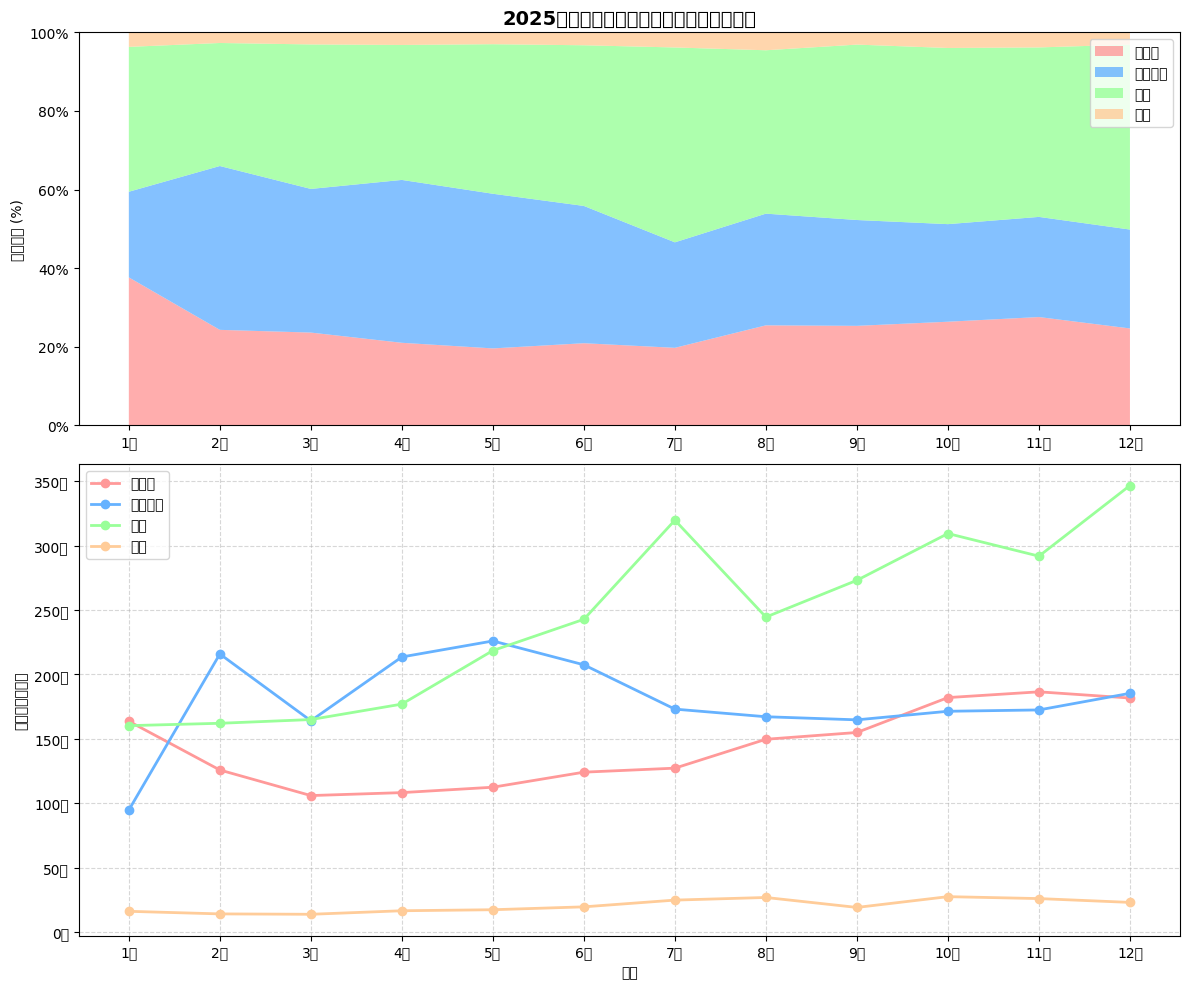

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# 设置中文字体（避免中文乱码）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据输入
data = {
    '月': ['1月', '2月', '3月', '4月', '5月', '6月', '7月', '8月', '9月', '10月', '11月', '12月'],
    '快生态-占比': [37.65, 24.30, 23.61, 21.01, 19.58, 20.90, 19.73, 25.45, 25.32, 26.37, 27.56, 24.66],
    '区域表单-占比': [21.79, 41.69, 36.55, 41.44, 39.35, 34.93, 26.84, 28.42, 26.93, 24.83, 25.48, 25.16],
    '应用-占比': [36.86, 31.30, 36.76, 34.34, 38.05, 40.88, 49.58, 41.57, 44.63, 44.82, 43.12, 47.06],
    '游戏-占比': [3.70, 2.72, 3.07, 3.21, 3.02, 3.29, 3.85, 4.56, 3.12, 3.98, 3.84, 3.12],
    '快生态-日均消耗': [1636154.098, 1257753.383, 1059241.863, 1082136.757, 1124094.088,
                     1240889.516, 1272043.758, 1496233.221, 1548892.68, 1819785.012,
                     1864429.189, 1816333.877],
    '区域表单-日均消耗': [946907.7629, 2158153.384, 1639830.193, 2135093.225, 2259212.901,
                       2074121.144, 1730163.55, 1671114.924, 1647017.753, 1713514.657,
                       1723888.161, 1852891.919],
    '应用-日均消耗': [1601955.073, 1620272.014, 1649224.673, 1769211.218, 2184747.08,
                   2427356.415, 3196549.701, 2444653.076, 2730123.598, 3093014.515,
                   2917403.712, 3465705.322],
    '游戏-日均消耗': [160937.7216, 140816.826, 137826.6018, 165232.2733, 173152.8951,
                    195564.4868, 247912.1921, 268239.6235, 191020.345, 274652.4276,
                    259727.7025, 230047.2959]
}

df = pd.DataFrame(data)

# 转换月份为排序用的数字（可选，确保顺序正确）
month_order = {'1月':1, '2月':2, '3月':3, '4月':4, '5月':5, '6月':6,
               '7月':7, '8月':8, '9月':9, '10月':10, '11月':11, '12月':12}
df['月序'] = df['月'].map(month_order)
df = df.sort_values('月序').reset_index(drop=True)

# 准备占比数据（转为小数）
share_cols = ['快生态-占比', '区域表单-占比', '应用-占比', '游戏-占比']
df_share = df[share_cols].values.T / 100.0  # shape: (4, 12)

# 准备消耗数据
consume_cols = ['快生态-日均消耗', '区域表单-日均消耗', '应用-日均消耗', '游戏-日均消耗']
df_consume = df[consume_cols]

# 绘图
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), height_ratios=[1, 1.2])

# 上图：占比堆叠面积图
labels = ['快生态', '区域表单', '应用', '游戏']
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

ax1.stackplot(df['月'], df_share, labels=labels, colors=colors, alpha=0.8)
ax1.set_ylabel('业务占比 (%)')
ax1.set_title('2025年各业务板块月度占比与日均消耗趋势', fontsize=14, weight='bold')
ax1.legend(loc='upper right')
ax1.set_ylim(0, 1)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))

# 下图：日均消耗折线图
for i, col in enumerate(consume_cols):
    ax2.plot(df['月'], df[col], marker='o', label=labels[i], color=colors[i], linewidth=2)

ax2.set_ylabel('日均消耗（元）')
ax2.set_xlabel('月份')
ax2.legend(loc='upper left')
ax2.grid(True, linestyle='--', alpha=0.5)
# 格式化Y轴为千分位
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/10000):,}万'))

plt.tight_layout()
plt.show()